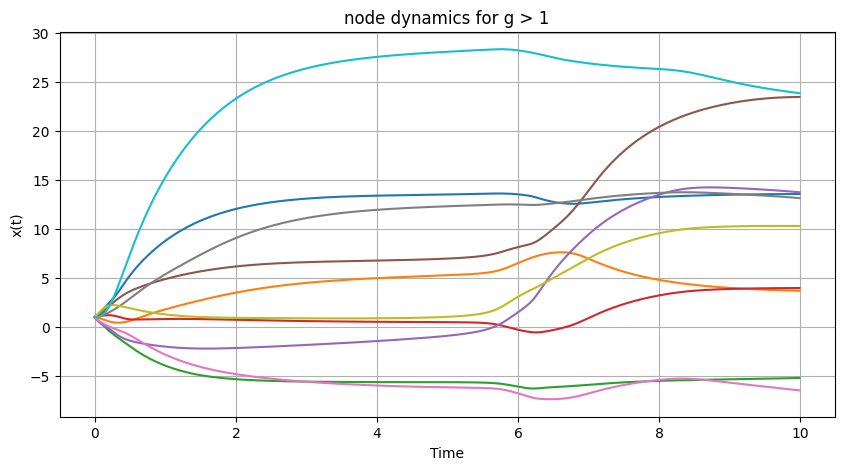

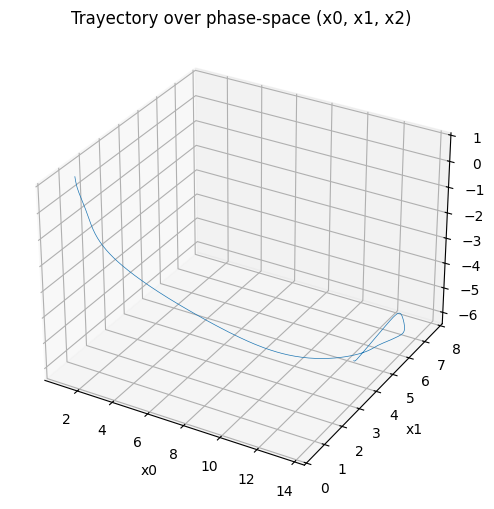

In [5]:
#applicazione del fluct- diss thm al caso di equazione indicata !
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #serve alla costruzione della derivata dello stato 
import networkx as nx
import random 

random.seed(5) #settaggio del seed 

#costruzione del network 
n = 50  # numero di nodi
p = 0.8  # probabilità di creazione delle connessioni
G = nx.gnp_random_graph(n, p) #erdos-renyi network fin qua ha struttura nodi e edges 

for i, j in G.edges():
    weight = np.random.normal(loc=0, scale=1)
    G[i][j]['weight'] = weight #ho assegnato i pesi estratti come collegamento fra gli elementi 



#CONVERSIONE NETWORK in matrice 
J = nx.to_numpy_array(G, weight='weight')

#usiamo @ come prodotto matrice vettore 
#studio della dinamica del network

#inizializzazione 
T = 1000
dt = 0.01 #passo di derivazione 
x =  np.ones(n) # condizione iniziale a cui posizioniamo tutti i nodi 

trajectory = np.zeros((T, n))  # per salvare la traiettoria

g = 1.5


# Integrazione con schema di Eulero
for t in range(T):
    csi = np.random.normal(loc=0, scale=0.01, size=n)
    x_dot = -x +  g*(J @ np.tanh(g*x)) + csi  
    x = x + dt * x_dot #aggiornamento del passo 
    trajectory[t] = x

# Plot di alcuni nodi, dinnamica a valore di g >1
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(np.arange(T) * dt, trajectory[:, i])
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('node dynamics for g > 1')
plt.grid(True)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
#studio nello spazio delle fasi considerando 3 nodi e valutando se vi è un attrattore di lorentz (otteniamo allargando i tempi), studio come si comportano i nodi fra loro 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5) #seleziono i nodi 
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')
ax.set_title('Trayectory over phase-space (x0, x1, x2)')
plt.show()
#csi rumore da inserire 
#come condizione iniziale dobbiamo fare un guess di come sia la situazione iniziale 



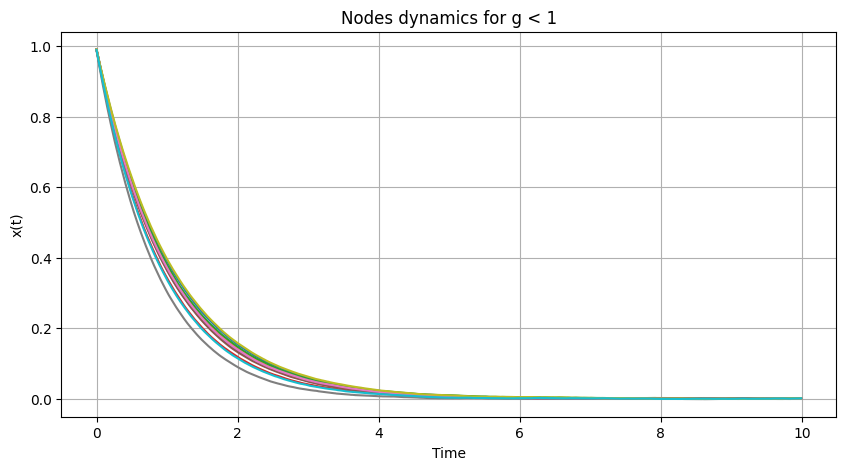

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #serve alla costruzione della derivata dello stato 
import networkx as nx
import random 

#come studio delle edo stocastiche sono descritte mediante EULERO 
random.seed(5) #settaggio del seed  

#costruzione del network 
n = 50  # numero di nodi
p = 0.8  # probabilità di creazione delle connessioni
G = nx.gnp_random_graph(n, p) #erdos-renyi network fin qua ha struttura nodi e edges 

for i, j in G.edges():
    weight = np.random.normal(loc=0, scale=1) #estratti i pesi da gaussiana
    G[i][j]['weight'] = weight #ho assegnato i pesi estratti come collegamento fra gli elementi 



#CONVERSIONE NETWORK in matrice 
J = nx.to_numpy_array(G, weight='weight')


#inizializzazione 
T = 1000
dt = 0.01 #passo di derivazione 
x =  np.ones(n) # condizione iniziale a cui posizioniamo tutti i nodi 

trajectory = np.zeros((T, n))  # per salvare la traiettoria, inizializzata a 0 

g = 0.1

# Integrazione con schema di Eulero
for t in range(T):
    csi = np.random.normal(loc=0, scale=0.01, size=n)
    x_dot = -x + g*(J @ np.tanh(g* x)) + csi  
    x = x + dt * x_dot
    trajectory[t] = x

# Plot di alcuni nodi, dinnamica a basso valore di g 
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(np.arange(T) * dt, trajectory[:, i])
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Nodes dynamics for g < 1')
plt.grid(True)
plt.show()